<a href="https://colab.research.google.com/github/BenjaminRiordan/workshops-and-tutorials/blob/main/NZ_Psyc_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://drive.google.com/uc?id=15j15k4eg73fqLNNM4EZfnmyJz48-rrDt" width="1000"></center>

# **NZ Psyc Workshop 2025**

---

Welcome to the 'handy dandy colab notebook' for our NZ Psyc tutorial on Zero-shot learning. We've tried to make this colab notebook super gentle and easy to use and have written it so you don't have to write any code and can just hit the "run" button.

To navigate through the notebook, you can use the "Table of Contents" on the left or you can just scroll down and follow along as I present. My hope is that you follow through as I talk, but I wouldn't do that... so feel free to jump around and have some and change code. You can't break anything, so just go hard on anything.

To run the code in any of the cells, you can hit the "play" icon in the top left corner. Alternatively, feel free to click on the code block and press "ctrl" and "enter" or just mash the keyboard until something happens.

We have also written the code so each example can "stand alone". This is so that if your notebook "times out" or if you want to copy and paste code into your own file you can do so without having to jump around too much.

## **Materials and resources**

The materials for this specific tutorial can be found on GitHub: https://github.com/BenjaminRiordan/workshops-and-tutorials/ and a lot of our other tutorials are available on CAPR's github.

Images: https://github.com/ltu-capr/zsl-image-tutorial

Text: https://github.com/ltu-capr/zsl-text-tutorial

**Tutorial paper**

Most of the code and examples have come from our tutorial papers, but we have a few papers on zero-shot learning (which is going to be our main focus):

* Riordan B, Bonela AA, He Z, Nibali A, Anderson-Luxford D, Kuntsche E. How to apply zero-shot learning to text data in substance use research: An overview and tutorial with media data. Addiction. 2024; 119(5): 951–959. https://doi.org/10.1111/add.16427

* Riordan B, Millward, J, He Z, Nibali A, Anderson-Luxford D, Salim, S., Patsouras, M., & Kuntsche E. How to analyse visual data using zero-shot learning: An overview and tutorial. (Under Review). Available on request

**Other papers**

*Comparison of ZSL and dedicated deep learning algorithm*

* Bonela, A.A., et al. The promise of zero-shot learning for alcohol image detection: comparison with a task-specific deep learning algorithm. Sci Rep 13, 11891 (2023). https://doi.org/10.1038/s41598-023-39169-4

*Commentary on why ZSL*

* Kuntsche E, He Z, Bonela AA, Riordan B. Zero-shot learning has the potential to revolutionise research on exposure to alcohol and other drugs in digital media. Int J Drug Policy. 2023 Aug;118:104098. https://doi.org/10.1016/j.drugpo.2023.104098.

# Example 1. Analysing text

We are going to use BARTLarge to analyse the text from a famous influencer's Instagram post - Harold. We want to see if Harold's posts reference alcohol or not to estimate how often Harold's impressionable viewers are exposed to alcohol. These examples are entirely made up, but the text is somewhat based on our ongoing work aiming to estimate how common alcohol is in social media posts from top influencers and to look for undeclared marketting.

This code is also very basic, but we cover it at length in our tutorial and offer some different examples[link text](https://).

**ZSL tutorial:**

Riordan B, Bonela AA, He Z, Nibali A, Anderson-Luxford D, Kuntsche E. How to apply zero-shot learning to text data in substance use research: An overview and tutorial with media data. Addiction. 2024; 119(5): 951–959. https://doi.org/10.1111/add.16427


<p align="center">
  <img src="https://drive.google.com/uc?id=1oUpoVpPq71HDZE7L0xMi7Bb0S2wU-PAu" width="200"/>
</p>


### Cell 1a. BARTLarge

Here we initialise the pipeline and specify "zero-shot-classification" and select our model "facebook/bart-large-mnli". Note that we can specify other tasks using the pipeline function, like "question-answering" where it gives you answers from the text or "summarization" where it will summarise text.

Note that, from memory, with Bartlarge's "question-answering" it will only answer the question with information from within the target text, which can actually be pretty handy.

We are going to start with zero-shot classification, though!

In [ ]:
# Load up our packages - bart large is large and might take a while

from transformers import pipeline

# Initialise the zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


### Cell 1b. Data and candidate labels

In order to perform classification we must nominate candidate labels for the model to choose between. In this scenario we have two labels, but you can choose as many labels as you need.

Feel free to play round with the labels like:
1. labels = ["alcohol", "not alcohol"]
2.  labels = ["booze", "not booze"]
3. labels = ["A social media post about alcohol", "A social media post not about alcohol"]

You can also add your own examples.

In [ ]:
# Here we give it some fake Tweets about blackouts!
posts = [
    "What do I know about elections? I'm just a mild-mannered toaster repairman with a wild imagination.",
    "My garage beer project is going very well. I am going to call the beer Harold's Health lager. People will love it.",
    "OK. I consumed too many of the health lager beers and feel very ill.",
    "I can't wait to go to the moon. I opened the portal in my garage and ave made friends with the marshmellow and jazz loving robots",
    "The jazz loving robots only love jazz",
    "Every time I drink whiskey I blackout",
    "The jazz playing robots DO NOT like beer. I think I can make my beer healthier and win them over.",
    "Having a cocktail at the club and now I'm blacking out",
    "Wow. I am tired. Interdimensional travel is tough",
    "Drinking a vodka tonic is the best way to blackout, especially when paired with Harold's Healthy Lager.",
    "Out now! Harold's Healthy Lager, best consumed on a beach",
    "Having a wonderful time"
]

# Define the candidate labels
labels = ["alcohol-related brand", "not alcohol-related"]

### Cell 1c. Print the classifications

Below we will print the tweet and the % in which the Tweet matches each of the categories "alcohol-related" or "not alcohol-related".

The example below shows that the Tweet is 99.88% alcohol-related vs. 0.12% non-alcohol-related.

* "*Drinking a vodka tonic is the best way to blackout*"

**alcohol-related**: 0.9988

**not alcohol-related**: 0.0012

In [ ]:
# Perform zero-shot classification on each post
for post in posts:
    print(f"Analyzing post: {post}")
    result = classifier(post, labels)

    # Print the results
    for label, score in zip(result["labels"], result["scores"]):
        print(f"{label}: {score:.4f}")
    print("\n")

Analyzing post: What do I know about elections? I'm just a mild-mannered toaster repairman with a wild imagination.
not alcohol-related: 0.8527
alcohol-related brand: 0.1473


Analyzing post: My garage beer project is going very well. I am going to call the beer Harold's Health lager. People will love it.
alcohol-related brand: 0.9959
not alcohol-related: 0.0041


Analyzing post: OK. I consumed too many of the health lager beers and feel very ill.
alcohol-related brand: 0.9954
not alcohol-related: 0.0046


Analyzing post: I can't wait to go to the moon. I opened the portal in my garage and ave made friends with the marshmellow and jazz loving robots
not alcohol-related: 0.5388
alcohol-related brand: 0.4612


Analyzing post: The jazz loving robots only love jazz
not alcohol-related: 0.9765
alcohol-related brand: 0.0235


Analyzing post: Every time I drink whiskey I blackout
alcohol-related brand: 0.9969
not alcohol-related: 0.0031


Analyzing post: The jazz playing robots DO NOT like be

### Cell 1d. Try your own text examples

Now you can enter your own text and candidate labels to classify data.

Pick a problem, like:

1. In a large survey, participants were asked to write about why they use social media. We want to classify their responses as either "enhancement", "coping", "social", or "conformity".
2. We collected all the Reddit posts that referenced the alcohol ban at the Paris olympics. we want to determine whether the poster thought "the alcohol ban is good", "the alcohol ban is bad", or "the alcohol ban is neither good nor bad".
3. We collected some song lyrics and want to know what the sentiment is "positive", "negative" or "neutral".


Just replace the "tweets" with some different examples. Change the "labels" to new labels and then click play!

For the example below I have considered two entirely fictitious people who work together. Based on the Tweets about them, they want to work out who is the coolest. It is pretty clear that the fictitious researcher named "Ben" is the coolest. But it is important we analyse social media posts to find out.

In [ ]:
# Note that this will only run if you have initialised the classifier in cell 3a. If you get an error, have a crack at running that cell and coming back to here.

tweets = [
    "Ben is cooler than Taylor",
    "Taylor is not as cool as Ben",
    "Taylor is not nearly as cool as Ben",
    "Ben is cooler than Taylor and Courtney",
    "I think my ranking is Ben is the coolest, then Taylor? Ben is definitely the coolest",
    "I can't believe Ben would spend his Sunday writing these out. What a nerd. This is a point against him. Taylor is cooler"
]

# Define the candidate labels
labels = ["Ben is the coolest", "Taylor is the coolest"]

# Perform zero-shot classification on each tweet
for tweet in tweets:
    print(f"Analyzing tweet: {tweet}")
    result = classifier(tweet, labels)

    # Print the results
    for label, score in zip(result["labels"], result["scores"]):
        print(f"{label}: {score:.4f}")
    print("\n")

Analyzing tweet: Ben is cooler than Taylor
Ben is the coolest: 0.9703
Taylor is the coolest: 0.0297


Analyzing tweet: Taylor is not as cool as Ben
Ben is the coolest: 0.9636
Taylor is the coolest: 0.0364


Analyzing tweet: Taylor is not nearly as cool as Ben
Ben is the coolest: 0.9716
Taylor is the coolest: 0.0284


Analyzing tweet: Ben is cooler than Taylor and Courtney
Ben is the coolest: 0.9885
Taylor is the coolest: 0.0115


Analyzing tweet: I think my ranking is Ben is the coolest, then Taylor? Ben is definitely the coolest
Ben is the coolest: 0.9776
Taylor is the coolest: 0.0224


Analyzing tweet: I can't believe Ben would spend his Sunday writing these out. What a nerd. This is a point against him. Taylor is cooler
Taylor is the coolest: 0.9916
Ben is the coolest: 0.0084




<p align="center">
  <img src="https://drive.google.com/uc?id=14g33-UKE2hH_C4zucGxomEcjOOoPIMNt" width="200"/>
</p>


# Example 2. Zero-shot learning - Images

Here we are going to use CLIP which has been trained on text-image pairs to identify what type of beverage is in an image.

Lets fire up CLIP!

### Cell 2a. Install software requirements



In [ ]:
!pip install accelerate==1.2.0 bitsandbytes==0.45.0 matplotlib numpy pandas transformers==4.46.0 tqdm scikit-learn
!pip install torch==2.5.1 torchvision==0.20.1 --index-url https://download.pytorch.org/whl/cu124

Looking in indexes: https://download.pytorch.org/whl/cu124


### Import essential modules

In [ ]:
import os
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from tqdm.notebook import tqdm
from transformers import CLIPProcessor, CLIPModel, LlavaNextProcessor, LlavaNextForConditionalGeneration, BitsAndBytesConfig

### Cell 2b Define useful functions
Here we define some useful functions to help compute metrics we want to report for both models. These functions will be used below for accuracy. The code here may look daunting, and it is okay if you don't fully understand it right away. If you prefer, you can simply run the code cell and move on to the next cell.
*italicized text*

In [ ]:
# some useful functions
def per_class_sensitivity_specificity(ground_truth_labels, predicted_labels, label_names):
    """Computes per-class sensitivity (recall) and specificity metrics.

    Metrics returned in order of label_names.
    """
    sensitivity_scores, specificity_scores = [], []
    for label_name in label_names:
        # Turn into binary problem. recall_score returns specificity then sensitivity
        specificity, sensitivity = recall_score(
            np.array(ground_truth_labels) == label_name, np.array(predicted_labels) == label_name,
            pos_label=True, average=None, zero_division=np.nan)
        sensitivity_scores.append(sensitivity)
        specificity_scores.append(specificity)
    return sensitivity_scores, specificity_scores


def generate_metric_report(ground_truth_labels, predicted_labels, label_names):
    """Computes and displays a report containing a collection of metrics.

    Per-class metrics include:
    - Precision
    - Recall (sensitivity)
    - Specificity
    - F1-Score (harmonic mean of precision and recall)

    Overall metrics include:
    - Accuracy
    - Unweighted Average Recall (UAR)
    """
    # Determine the length of the longest label name to format the table.
    len_longest_label = max(len(label_name) for label_name in label_names)

    # Compute per-class metrics.
    per_class_precision = precision_score(ground_truth_labels, predicted_labels, labels=label_names, average=None, zero_division=np.nan)
    per_class_recall, per_class_specificity = per_class_sensitivity_specificity(ground_truth_labels, predicted_labels, label_names=label_names)
    per_class_f1_score = f1_score(ground_truth_labels, predicted_labels, labels=label_names, average=None, zero_division=np.nan)

    # Display the per-class summary.
    print(f'{"":^{len_longest_label}s}    {"precision":>9s}    {"recall":>6s}    {"specificity":>11s}    {"f1-score":>9s}    {"support":>6s}\n')
    for label_idx, label_name in enumerate(label_names):
        print(f'{label_name:>{len_longest_label}s}    {per_class_precision[label_idx]:>9.2f}    {per_class_recall[label_idx]:>6.2f}    {per_class_specificity[label_idx]:>11.2f}    {per_class_f1_score[label_idx]:>9.2f}    {ground_truth_labels.count(label_name):>6d}')
    print('\n')

    # Compute overall metrics.
    accuracy = accuracy_score(ground_truth_labels, predicted_labels)
    uar = recall_score(ground_truth_labels, predicted_labels, labels=label_names, average='macro', zero_division=np.nan)

    # Display the overall metrics.
    print(f'{"Number of Examples":>35s}: {len(ground_truth_labels)}')
    print(f'{"Overall Accuracy":>35s}: {accuracy:.2%}')
    print(f'{"Unweighted Average Recall (UAR)":>35s}: {uar:.2%}')

## Cell 2c. A basic run with CLIP

I have added 12 images on github. They are beautifully balanced, there are 3 Beer images, 3 Coffee images, 3 Tea images, and 3 wind images. We are going to load these images in just using the url of each of the images and analyse them to determine which beverage is present.

This data is very similar to the data we used when comparing CLIP to ABIDLA2 and is very similar to what the google images look like. There is a beverage and the beverage is front and centre.

The images look like this:

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=157AT1INfpPmvoduqnKTQsaQXgqAq3CMu" width="600"/>
</p>

In [ ]:
# Transforms the images before feedinf them to the model (Centercrop crops the center part of the image; ToTensor converts the image to a multidimension aray)
transform = Compose([
    Resize(256, interpolation=Image.BICUBIC),
    CenterCrop(224),
    ToTensor()
])

# Images from Github repository - these were free from Pexels.
image_urls = [
    "https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/BEER1.jpg",
    "https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/BEER2.jpg",
    "https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/BEER3.jpg",
    "https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/COFFEE1.jpg",
    "https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/COFFEE2.jpg",
    "https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/COFFEE3.jpg",
    "https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/TEA1.jpg",
    "https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/TEA2.jpg",
    "https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/TEA3.jpg",
    "https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/WINE1.jpg",
    "https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/WINE2.jpg",
    "https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/WINE3.jpg"
]

# Define the labels
labels = ["Beer", "Wine", "Coffee", "Tea"]

# Perform zero-shot classification on each image
for image_url in image_urls:
    # Open and preprocess the image
    image = transform(Image.open(BytesIO(requests.get(image_url).content))).unsqueeze(0).to(device)

    # Compute the similarity between the image and the text descriptions
    with torch.no_grad():
        similarities = model.get_image_features(image) @ model.get_text_features(processor(labels, return_tensors="pt", padding=True, truncation=True).to(device)["input_ids"]).T

    # Print the result with the highest similarity score
    print(f"Most likely label for {image_url}: {labels[similarities[0].topk(1).indices[0]]}\n")

Most likely label for https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/BEER1.jpg: Beer

Most likely label for https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/BEER2.jpg: Beer

Most likely label for https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/BEER3.jpg: Beer

Most likely label for https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/COFFEE1.jpg: Coffee

Most likely label for https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/COFFEE2.jpg: Coffee

Most likely label for https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/COFFEE3.jpg: Coffee

Most likely label for https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/TEA1.jpg: Tea

Most likely label for https://raw.githubusercontent.com/Ben

## Cell 2d prompt engineering

Well, it sucked with tea. Why don't we use different prompts. CLIP is trained on more descritive phrases, so lets give that a crack.

Holy poop. this example worked out far better than I could've ever imagined. Are you guys seeing this! The magic of phrase engineering!

In [ ]:
# Define the labels
labels = ["An image of Beer", "An image of a glass of Wine", "An image of a cup of coffee", "An image of a cup of tea"]

# Perform zero-shot classification on each image
for image_url in image_urls:
    # Open and preprocess the image
    image = transform(Image.open(BytesIO(requests.get(image_url).content))).unsqueeze(0).to(device)

    # Compute the similarity between the image and the text descriptions
    with torch.no_grad():
        similarities = model.get_image_features(image) @ model.get_text_features(processor(labels, return_tensors="pt", padding=True, truncation=True).to(device)["input_ids"]).T

    # Print the result with the highest similarity score
    print(f"Most likely label for {image_url}: {labels[similarities[0].topk(1).indices[0]]}\n")

Most likely label for https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/BEER1.jpg: An image of Beer

Most likely label for https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/BEER2.jpg: An image of Beer

Most likely label for https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/BEER3.jpg: An image of Beer

Most likely label for https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/COFFEE1.jpg: An image of a cup of coffee

Most likely label for https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/COFFEE2.jpg: An image of a cup of coffee

Most likely label for https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutorials/main/KBS2024/images/COFFEE3.jpg: An image of a cup of coffee

Most likely label for https://raw.githubusercontent.com/BenjaminRiordan/workshops-and-tutor

# Example 3. More difficult images with CLIP

OK. Well that was easy and child's play. But those examples of images were very easy. Way too easy.

Let's try some harder examples using the VANITY dataset (Visual Alcohol and Non-alcohol Images to Test Your models).

Josh wrote the code in the next section and his skills are far superior to mine. So some of this looks way more intense and it is because Josh wrote some really epic code to get this thing humming and to present the accuracy stats. Thanks Josh! It can look a little more daunting, but we are just going to hit play on everything!

To evaluate model performance across different beverage types and scenes, we have constructed a dataset consisting of the following beverages:

**Alcoholic Beverages**
*   Beer bottle
*   Beer cup
*   Red wine glass
*   White wine glass


**Non-Alcoholic Beverages**
*   Coffee cup
*   Coffee plunger
*   Tea cup
*   Water bottle
*   Water cup


Multiple images of each beverage have been captured across five distinct scenes, both indoor and outdoor, with the beverage positioned at three different distances from the camera: foreground, midground, and background. The image below shows examples of the images contained in the dataset:

<div>
<img src="https://github.com/ltu-capr/zsl-image-tutorial/blob/main/dataset_example.jpg?raw=1" width="70%"/>
</div>

In total, for each of the nine beverage types, images have been taken across five different scenes and at three focal distances, resulting in 15 images per beverage. This leads to a complete dataset of 135 images (9 beverages $\times$ 15 images each).


### Cell 3a. Load up the dataset

In [ ]:
# Download and extract the zipped image dataset.
!wget -O images.zip 'https://github.com/ltu-capr/zsl-image-tutorial/raw/refs/heads/main/Data/Images.zip'
!unzip -o -q images.zip -d ./Images

# Load the CSV file containing the labels for each image.
# Here we are giving the URL for a sample file that we've made publicly
# available on the Internet.
labels_location = 'https://raw.githubusercontent.com/ltu-capr/zsl-image-tutorial/main/Data/images_labelled.csv'
beverage_dataframe = pd.read_csv(labels_location)

--2025-08-26 03:04:44--  https://github.com/ltu-capr/zsl-image-tutorial/raw/refs/heads/main/Data/Images.zip
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/ltu-capr/zsl-image-tutorial/refs/heads/main/Data/Images.zip [following]
--2025-08-26 03:04:44--  https://media.githubusercontent.com/media/ltu-capr/zsl-image-tutorial/refs/heads/main/Data/Images.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 186295028 (178M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>] 177.66M  64.4MB/s    in 2.8s    

2025-08-26 03:04:47 (64.4 MB/s) - ‘images.

### Cell 3b. Visualise the "beverage" dataset


Here we visualise a few of the examples from the dataset.

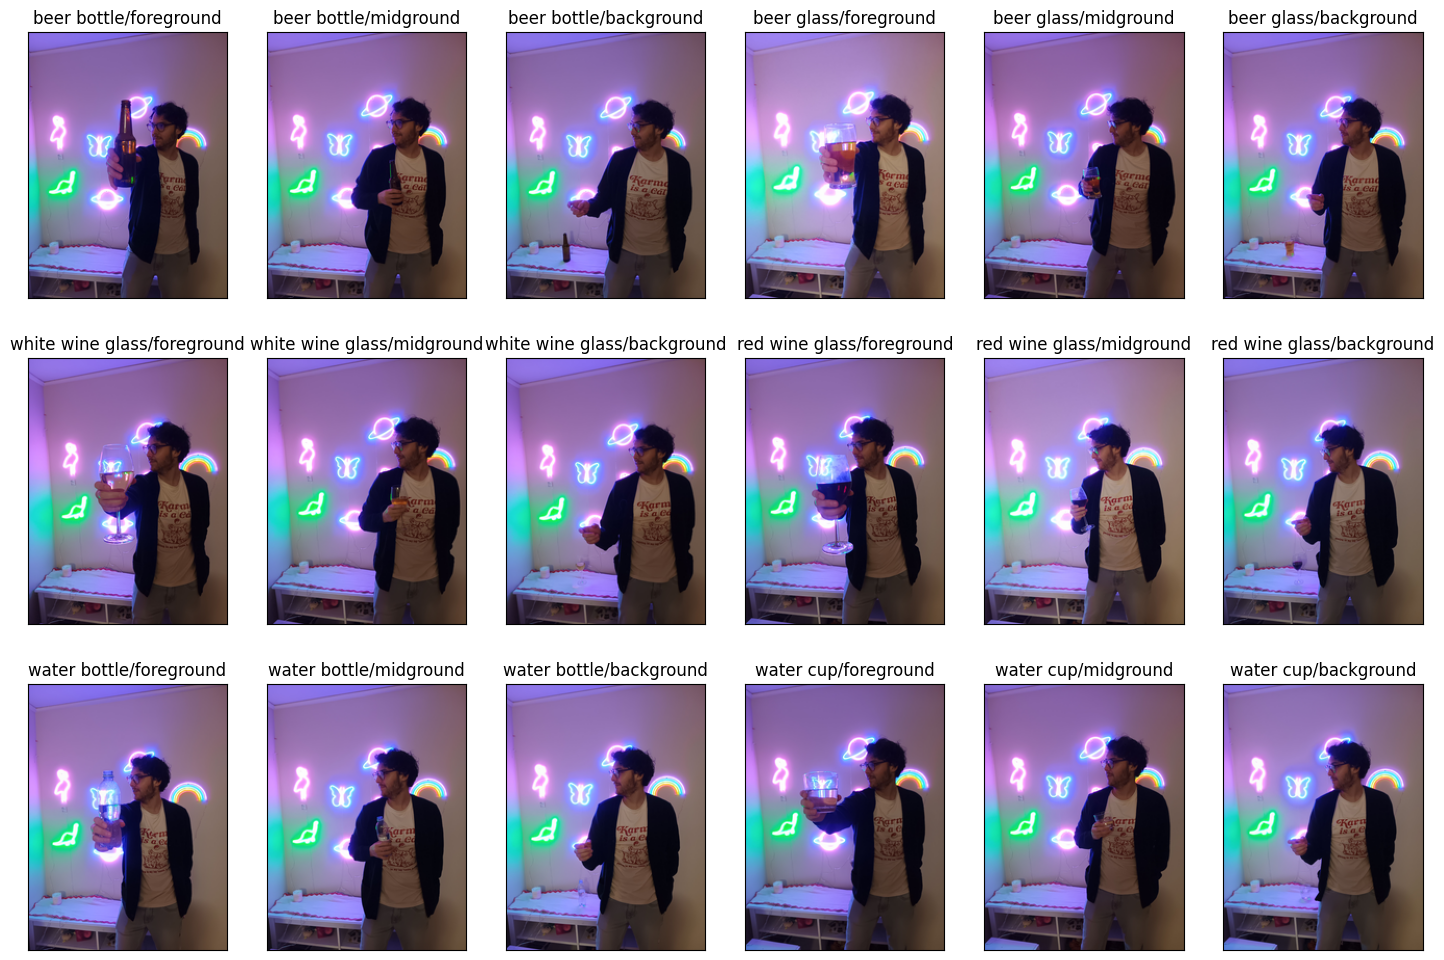

In [ ]:

# Define how many images to show.
rows, cols = 3, 6
num_images = rows * cols

# Create a 3x6 grid for displaying images.
fix, axes = plt.subplots(3, 6, figsize=(18, 12))
axes = axes.flatten()

for index, sample in beverage_dataframe[:num_images].iterrows():
    # Load the image and create a small thumbnail.
    im = Image.open('Images/' + sample['image_name'] + '.jpg')
    im.thumbnail((256, 256), Image.Resampling.LANCZOS)

    # Display the image, setting the title as the beverage type and focal location.
    axes[index].imshow(im)
    axes[index].set_title(f'{sample["beverage"]}/{sample["position"]}')

    # Hide the axis markers.
    axes[index].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

# Display the plot.
plt.show()

## Cell 3c: Initialise the CLIP model

Initialise the CLIP model for use in zero-shot image classification. It may take a while for the model to download.

In [ ]:
# Use the GPU if it's available.
clip_device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

# Load the pre-trained model.
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(clip_device)

# Load an object used to prepare images in the right way required by CLIP
# This will: resize, centrecrop, and normalise the images.
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

## Cell 3d: Initialise classification labels

In order to perform classification, we must nominate candidate labels for the model to choose between. In this scenario we have 6x labels, however you can choose as many labels as you need.

It is possible to further engineer the text in these labels.

In [ ]:
candidate_labels = [
    'A photo containing beer',
    'A photo containing wine',
    'A photo containing coffee',
    'A photo containing tea',
    'A photo containing water',
    'A photo containing no drinks'
]

## Cell 3e: Make model predictions
Here we generate predictions for all images in our dataset.

In this example we also implement batching, enabling the model to process multiple images simultaneously. This is especially useful for larger datasets, as it can reduce computational overhead and speed up predictions.

  0%|          | 0/14 [00:00<?, ?it/s]

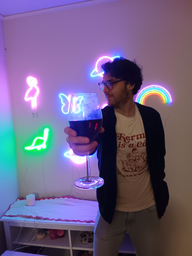

Most likely label for redwine_glass_foreground1: A photo containing wine (probability: 72.7%)
Per-class probabilities:
	A photo containing beer: 9.6%
	A photo containing wine: 72.7%
	A photo containing coffee: 0.8%
	A photo containing tea: 0.5%
	A photo containing water: 0.2%
	A photo containing no drinks: 16.2%


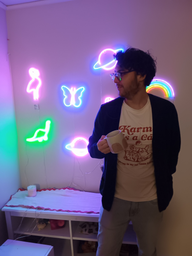

Most likely label for coffee_cup_midground1: A photo containing no drinks (probability: 45.8%)
Per-class probabilities:
	A photo containing beer: 24.8%
	A photo containing wine: 12.2%
	A photo containing coffee: 7.1%
	A photo containing tea: 7.0%
	A photo containing water: 3.2%
	A photo containing no drinks: 45.8%


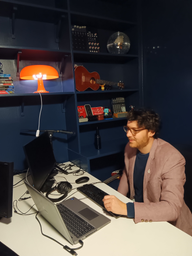

Most likely label for beer_bottle_background2: A photo containing coffee (probability: 34.8%)
Per-class probabilities:
	A photo containing beer: 4.7%
	A photo containing wine: 11.0%
	A photo containing coffee: 34.8%
	A photo containing tea: 27.5%
	A photo containing water: 8.0%
	A photo containing no drinks: 14.0%


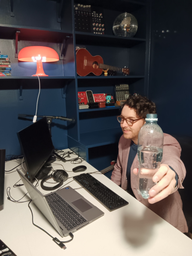

Most likely label for water_bottle_foreground2: A photo containing tea (probability: 24.0%)
Per-class probabilities:
	A photo containing beer: 6.2%
	A photo containing wine: 6.8%
	A photo containing coffee: 21.5%
	A photo containing tea: 24.0%
	A photo containing water: 19.2%
	A photo containing no drinks: 22.4%


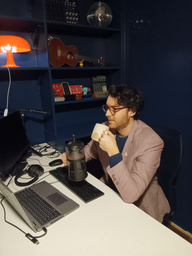

Most likely label for coffee_plunger_midground2: A photo containing coffee (probability: 55.6%)
Per-class probabilities:
	A photo containing beer: 1.7%
	A photo containing wine: 1.1%
	A photo containing coffee: 55.6%
	A photo containing tea: 38.4%
	A photo containing water: 0.5%
	A photo containing no drinks: 2.7%


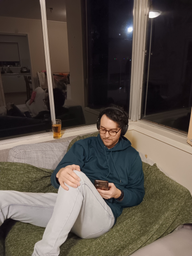

Most likely label for beer_glass_background3: A photo containing beer (probability: 40.7%)
Per-class probabilities:
	A photo containing beer: 40.7%
	A photo containing wine: 10.9%
	A photo containing coffee: 3.7%
	A photo containing tea: 4.2%
	A photo containing water: 0.9%
	A photo containing no drinks: 39.6%


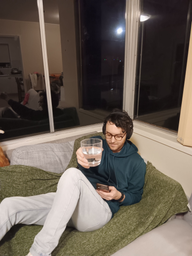

Most likely label for water_cup_foreground3: A photo containing wine (probability: 64.3%)
Per-class probabilities:
	A photo containing beer: 11.2%
	A photo containing wine: 64.3%
	A photo containing coffee: 1.2%
	A photo containing tea: 1.6%
	A photo containing water: 8.8%
	A photo containing no drinks: 12.8%


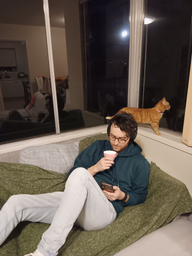

Most likely label for tea_cup_midground3: A photo containing coffee (probability: 59.2%)
Per-class probabilities:
	A photo containing beer: 3.2%
	A photo containing wine: 3.2%
	A photo containing coffee: 59.2%
	A photo containing tea: 26.2%
	A photo containing water: 0.3%
	A photo containing no drinks: 8.0%


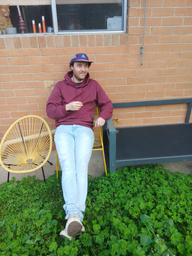

Most likely label for whitewine_glass_background4: A photo containing wine (probability: 41.3%)
Per-class probabilities:
	A photo containing beer: 14.6%
	A photo containing wine: 41.3%
	A photo containing coffee: 12.2%
	A photo containing tea: 13.3%
	A photo containing water: 3.5%
	A photo containing no drinks: 15.2%


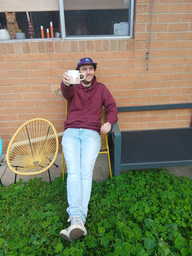

Most likely label for coffee_cup_foreground4: A photo containing coffee (probability: 51.0%)
Per-class probabilities:
	A photo containing beer: 3.2%
	A photo containing wine: 4.7%
	A photo containing coffee: 51.0%
	A photo containing tea: 37.4%
	A photo containing water: 0.6%
	A photo containing no drinks: 3.0%


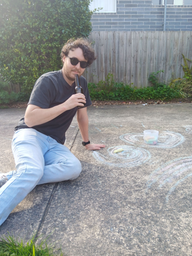

Most likely label for beer_bottle_midground5: A photo containing beer (probability: 53.4%)
Per-class probabilities:
	A photo containing beer: 53.4%
	A photo containing wine: 18.0%
	A photo containing coffee: 0.9%
	A photo containing tea: 5.2%
	A photo containing water: 1.5%
	A photo containing no drinks: 21.1%


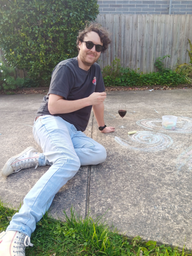

Most likely label for redwine_glass_background5: A photo containing wine (probability: 91.0%)
Per-class probabilities:
	A photo containing beer: 5.2%
	A photo containing wine: 91.0%
	A photo containing coffee: 0.4%
	A photo containing tea: 0.2%
	A photo containing water: 0.1%
	A photo containing no drinks: 3.1%


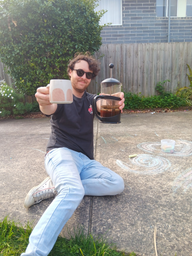

Most likely label for coffee_plunger_foreground5: A photo containing tea (probability: 45.3%)
Per-class probabilities:
	A photo containing beer: 15.6%
	A photo containing wine: 2.4%
	A photo containing coffee: 32.4%
	A photo containing tea: 45.3%
	A photo containing water: 0.5%
	A photo containing no drinks: 3.8%


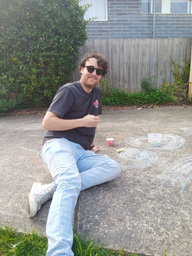

Most likely label for tea_cup_background5: A photo containing beer (probability: 60.4%)
Per-class probabilities:
	A photo containing beer: 60.4%
	A photo containing wine: 8.5%
	A photo containing coffee: 1.5%
	A photo containing tea: 6.2%
	A photo containing water: 2.2%
	A photo containing no drinks: 21.3%


In [ ]:
# Set the batch size (how many images to process at once).
clip_batch_size = 10

# Generate prediction results for all images in our dataset.
all_results = []
for index in tqdm(range(0, len(beverage_dataframe), clip_batch_size)):
    # Extract the next set of data to process.
    next_data = beverage_dataframe.iloc[index:index + clip_batch_size]

    # Open the images.
    images = [Image.open('Images/' + sample['image_name'] + '.jpg') for _, sample in next_data.iterrows()]

    # Preprocess the data to the correct format.
    inputs = clip_processor(
        text=candidate_labels,
        images=images, return_tensors='pt', padding=True
    ).to(clip_device)

    # Get the model outputs.
    with torch.no_grad():
        outputs = clip_model(**inputs)

    # Get the logits per-image (the image-text similarity score to each candidate label).
    image_logits = outputs.logits_per_image.cpu()

    # Convert logits per-image into probabilities with a softmax, then convert to a list.
    image_probs = image_logits.softmax(dim=1)
    image_probs = list(torch.unbind(image_probs, dim=0))

    # Store the probabilities.
    all_results.extend(image_probs)

    # Visualise last result in batch as model is running.
    last_image = images[-1]
    last_image_name = next_data.iloc[-1]['image_name']
    last_image_probs = all_results[-1]

    # Determine the index of the highest probability.
    highest_idx = torch.argmax(last_image_probs)

    # Prepare the image for displaying
    thumb_im = last_image.copy()
    thumb_im.thumbnail((256, 256), Image.Resampling.LANCZOS)
    display(thumb_im)

    print(f'Most likely label for {last_image_name}: {candidate_labels[highest_idx]} (probability: {100 * last_image_probs[highest_idx].item():.1f}%)')
    print(f'Per-class probabilities:')
    for lbl_idx, label in enumerate(candidate_labels):
        print(f'\t{label}: {100 * last_image_probs[lbl_idx]:.1f}%')

# Accuracy

#### Cell 1.4a. Metric computation
In the code cell below, we will generate a table that summarises the precision, recall, specificity and F1 score for each beverage type individually, in addition to other statistics summarising the overall model performance, such as the overall accuracy and unweighted average recall (UAR).

In the generated report, *support* refers to the number of ground truth labels belonging to that class.

In [ ]:
# Put the predictions and ground truth into the right format.
predicted_labels = [candidate_labels[torch.argmax(result)] for result in all_results]
ground_truth_labels = list('A photo containing ' + beverage_dataframe['beverage_type'])

# Produce the metrics report.
generate_metric_report(ground_truth_labels, predicted_labels, label_names=candidate_labels)

                                precision    recall    specificity     f1-score    support

     A photo containing beer         0.46      0.60           0.80         0.52        30
     A photo containing wine         0.52      0.40           0.90         0.45        30
   A photo containing coffee         0.52      0.47           0.88         0.49        30
      A photo containing tea         0.12      0.13           0.88         0.12        15
    A photo containing water          nan      0.00           1.00         0.00        30
A photo containing no drinks         0.00       nan           0.79         0.00         0


                 Number of Examples: 135
                   Overall Accuracy: 34.07%
    Unweighted Average Recall (UAR): 32.00%


## Cell 2g. Confusion matrix

We can analyse the model's performance in a more detailed manner by visualising a confusion matrix. A confusion matrix shows how many dataset examples there are for each possible pair of true and predicted labels. Numbers which do not lie on the main diagonal of the matrix correspond to misclassifications. By inspecting the classification matrix, we can quickly observe specific classes that the model is performing poorly on. For example, in this case we can see the model is best at correctly identifying photos containing beer, wine, and coffee, however struggles with other beverage types, such as water.

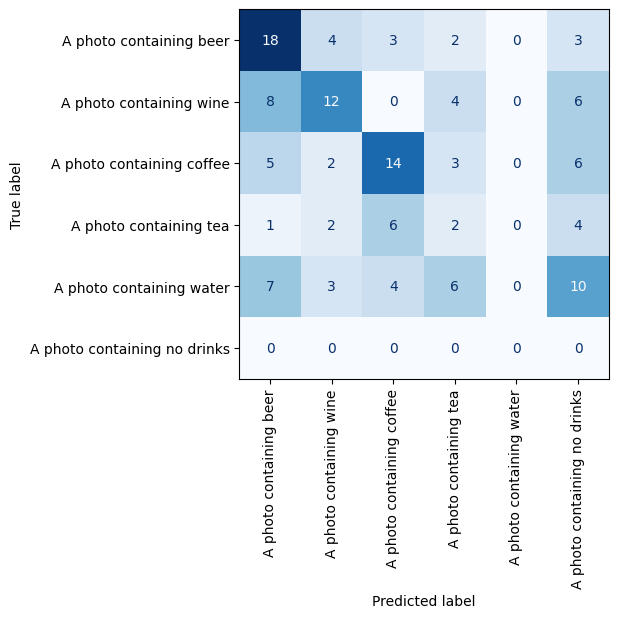

In [ ]:
ConfusionMatrixDisplay.from_predictions(ground_truth_labels, predicted_labels, labels=candidate_labels, xticks_rotation='vertical', cmap='Blues', colorbar=False);

               precision    recall    specificity     f1-score    support

    alcohol         0.68      0.70           0.73         0.69        60
not alcohol         0.75      0.73           0.70         0.74        75


                 Number of Examples: 135
                   Overall Accuracy: 71.85%
    Unweighted Average Recall (UAR): 71.67%


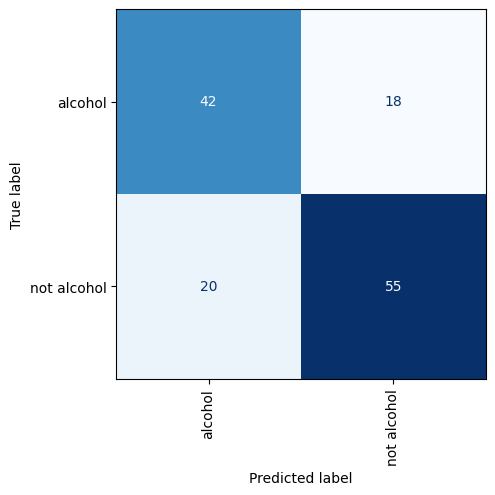

In [ ]:
# Put the predictions and ground truth into the right format.
predicted_labels = [candidate_labels[torch.argmax(result)] for result in all_results]
predicted_labels = ['alcohol' if 'beer' in label or 'wine' in label else 'not alcohol' for label in predicted_labels]
ground_truth_labels = list(beverage_dataframe['alcohol_notalcohol'])

# Produce the metrics report.
generate_metric_report(ground_truth_labels, predicted_labels, label_names=['alcohol', 'not alcohol'])

# Generate the confusion matrix.
ConfusionMatrixDisplay.from_predictions(ground_truth_labels, predicted_labels, labels=['alcohol', 'not alcohol'], xticks_rotation='vertical', cmap='Blues', colorbar=False);

# Conclusions and next steps

Well! CLIP wasn't as sharp with the beverages when the bevarage was less in your face. But if we look at alcohol vs. not alcohol it is OK.... I still would feel uncomfortanle using this model.

We have however found that other models are really really good at this! Really good. You may ask "why didn't you just use LLaVA here?" The answer is because it is a larger model and requires a GPU. You can access this with the free tier of Google Colab, but the model will still take a lot longer to run.... because it is a lot larger.

So you have some homework!

LLaVA is particularly good! We have run a tutorial here: https://colab.research.google.com/github/ltu-capr/zsl-image-tutorial/blob/master/ZSL_for_image_beverage_classification.ipynb#scrollTo=aoogcj1ss9TS

